<a href="https://colab.research.google.com/github/JianchaoSun/learning_machine_learning/blob/master/SimpleModelwithoutConsideringOverfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
#import matplot as plt
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#test_images.shape
#plt.figure()
#plt.imshow(test_images[0])

In [0]:

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float')/255

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)



In [28]:
network = tf.keras.models.Sequential()
network.add(tf.keras.layers.Dense(256,activation = 'relu', input_shape = (28*28,)))
network.add(tf.keras.layers.Dense(512,activation = 'relu'))
network.add(tf.keras.layers.Dense(10,activation = 'softmax'))
network.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_52 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_53 (Dense)             (None, 10)                5130      
Total params: 337,674
Trainable params: 337,674
Non-trainable params: 0
_________________________________________________________________


In [29]:
#add model check point to save best performance, and tensorboard
checkpoint = tf.keras.callbacks.ModelCheckpoint('Users\jianchaosun⁩\⁨Downloads⁩\savepoint\b1.h5', monitor='val_acc', verbose=1, save_best_only=True)
tensorboard = tf.keras.callbacks.TensorBoard(log_dir='logs2/{}'.format(time()),write_graph=True, write_grads=True, write_images=True)
network.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
# This builds the model for the first time:
history = network.fit(train_images, train_labels, batch_size = 64, epochs = 6, validation_data = (test_images, test_labels),callbacks=[checkpoint,tensorboard])


Train on 60000 samples, validate on 10000 samples
Epoch 1/6
59968/60000 [============================>.] - ETA: 0s - loss: 0.4752 - acc: 0.8284
Epoch 00001: val_acc improved from -inf to 0.84440, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 10s 164us/sample - loss: 0.4752 - acc: 0.8284 - val_loss: 0.4212 - val_acc: 0.8444
Epoch 2/6
59904/60000 [============================>.] - ETA: 0s - loss: 0.3566 - acc: 0.8694
Epoch 00002: val_acc improved from 0.84440 to 0.86500, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.3566 - acc: 0.8694 - val_loss: 0.3688 - val_acc: 0.8650
Epoch 3/6
59648/60000 [============================>.] - ETA: 0s - loss: 0.3166 - acc: 0.8827
Epoch 00003: val_acc improved from 0.86500 to 0.86570, saving model to Users\jianchaosun⁩\⁨Downloads⁩\savepoint1.h5
60000/60000 [==============================] - 7s 122us/sampl

In [30]:
scores = network.evaluate(test_images, test_labels)
print("\n%s: %.2f%%" % (network.metrics_names[1], scores[1]*100))
network.predict(test_images)[0]

10000/10000 [==============================] - 1s 100us/sample - loss: 0.3380 - acc: 0.8815

acc: 88.15%


array([4.4826771e-07, 1.1741120e-05, 6.6538786e-07, 8.0508482e-07,
       3.9109605e-07, 7.6593176e-02, 2.5114805e-06, 1.8622941e-01,
       4.0693185e-06, 7.3715681e-01], dtype=float32)

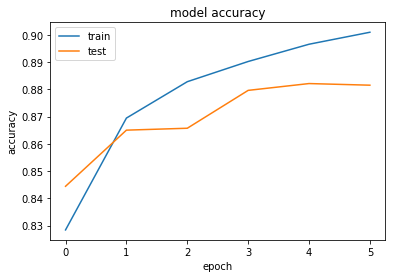

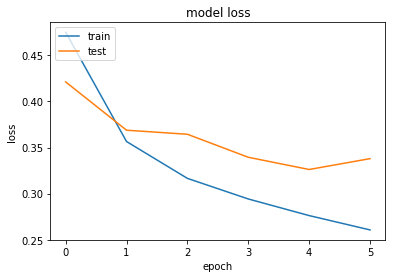

In [32]:
import matplotlib.pyplot as plt
#plot graph for comparsion between tain and test accuract
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip


--2019-06-16 15:44:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.22.236.254, 3.214.163.243, 52.4.75.11, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.22.236.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16648024 (16M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  15.88M  18.7MB/s    in 0.8s    

2019-06-16 15:44:24 (18.7 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [16648024/16648024]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)


In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [4]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

http://c5dbcea3.ngrok.io
